In [1]:
import matplotlib.pyplot as plt
import pandas as pd

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("articles_data.csv", index_col="index")

In [3]:
# Create pie chart with matplotlib
def createPieChart(title, datas, labels, explode, autopct = '%1.2f%%') :
    fig, ax = plt.subplots()
    
    ax.pie(datas, explode=explode, labels=labels, autopct=autopct,
            shadow=True, startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title(title)

    plt.show()

In [4]:
# Create Bar Horizontal chart with matplotlib
def createBarHChart(title, datas, labels, colors = ['blue']) :
    barWidth = 0.7

    r = range(len(datas))

    plt.yticks(range(len(datas)), labels)
    
    plt.title(title)

    plt.barh(r, datas, height = barWidth, color = colors)

In [8]:
# Quel pourcentage d'articles likés est également partagés
df.fillna(0)
# df = df.drop(750)
df.published_at = pd.to_datetime(df.published_at)
# nombre d'article total
nbArticle = len(df)
# nombre d'article liké
nbArticleLike = len(df.query('engagement_reaction_count > 0'))
# nombre d'article liké et partagé
nbArticleLikeAndShare = len(df.query('engagement_reaction_count > 0 \
                                      and engagement_share_count > 0'))
# nombre d'article liké et commenté
nbArticleLikeAndComment = len(df.query('engagement_reaction_count > 0 \
                                        and engagement_comment_count > 0'))
# nombre d'article liké, partagé et commenté
nbArticleLikeAndShareAndComment = len(df.query('engagement_reaction_count > 0 \
                                                and engagement_share_count > 0 \
                                                and engagement_comment_count > 0'))
datas = [
           # nbArticleLike / nbArticle * 100,
            nbArticleLikeAndShare / nbArticleLike * 100,
            nbArticleLikeAndComment / nbArticleLike * 100,
            nbArticleLikeAndShareAndComment / nbArticleLikeAndShare * 100
]
labels = [
            #'Like',
            'Like & Share',
            'Like & Comment',
            'Like & Share & Comment'
        ]

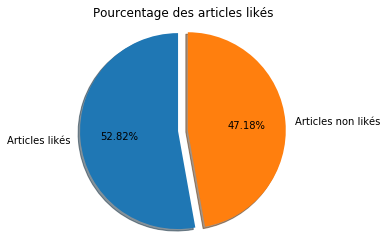

In [14]:
pctLike = pd.Series([nbArticleLike / nbArticle * 100], index = ['Like'])

title_article_likes = 'Pourcentage des articles likés'
datas_article_likes = [nbArticleLike / nbArticle * 100, 100 - (nbArticleLike / nbArticle * 100)]
labels_article_likes = ['Articles likés', 'Articles non likés']
explode_article_likes = [0.1,0]

createPieChart(title_article_likes, datas_article_likes, labels_article_likes, explode_article_likes)

In [ ]:
title = 'Pourcentage des articles selon les engagements'

datas = [
        nbArticleLikeAndShare / nbArticleLike * 100,
        nbArticleLikeAndComment / nbArticleLike * 100,
        nbArticleLikeAndShareAndComment / nbArticleLikeAndShare * 100
]

labels = [
            #'Like',
            'Like & Share',
            'Like & Comment',
            'Like & Share & Comment'
]

colors = ['#fe4a49','#2ab7ca','#fed766']

createBarHChart(title, datas, labels, colors)

In [ ]:
df.groupby('source_name').count()['title'].plot.bar()

In [ ]:
# Crée un dataframe contenant les articles signés

dfWithoutNaNAuthor = df[df['author'].notnull()]

dfWithoutNaNAuthor = dfWithoutNaNAuthor[dfWithoutNaNAuthor.apply(lambda x: x.source_name not in x.author, axis=1)]
dfWithoutNaNAuthor = dfWithoutNaNAuthor[dfWithoutNaNAuthor.apply(lambda x: x.author not in x.source_name, axis=1)]

keywordBanned = ('The', 'http', 'BBC', 'ABC', 'CBS', 'WSJ Staff')

dfWithoutNaNAuthor = dfWithoutNaNAuthor[~dfWithoutNaNAuthor.author.str.startswith(keywordBanned)]

count = dfWithoutNaNAuthor['author'].str.split().str.len()
dfWithAuthor = dfWithoutNaNAuthor[~(count==1)]

# nbTotalArticle = len(df)
# nbTotalArticleSigne = len(dfWithAuthor)

# print ('nbTotalArticle = ' + str(nbTotalArticle))
# print ('nbTotalArticleSigne = ' + str(nbTotalArticleSigne))
# print ('% article signé = ' + str(round(nbTotalArticleSigne / nbTotalArticle * 100,2)))

# pctArticleSigne = pd.Series([nbTotalArticleSigne / nbTotalArticle * 100], index = ['Article signé'])
# pctArticleSigne.plot.bar()

# for x in dfWithAuthor.author:
#     print(x)

In [ ]:
dfWithoutAuthorSign = df[~df.index.isin(dfWithAuthor.index)]

# dfWithoutAuthorSign = dfWithoutAuthorSign.fillna(0)
# dfWithAuthor = dfWithAuthor.fillna(0)

nbTotalArticle = len(df)
nbTotalArticleSigne = len(dfWithAuthor)
nbTotalArticleNonSigne = len(dfWithoutAuthorSign)

pctArticleSigne = round(nbTotalArticleSigne / nbTotalArticle * 100,2)
pctArticleNonSigne = round(nbTotalArticleNonSigne / nbTotalArticle * 100,2)

dfWithAuthor['nb_engagement'] = dfWithAuthor['engagement_reaction_count'] \
                                + dfWithAuthor['engagement_comment_count'] \
                                + dfWithAuthor['engagement_share_count'] \
                                + dfWithAuthor['engagement_comment_plugin_count']

dfWithoutAuthorSign['nb_engagement'] = dfWithoutAuthorSign['engagement_reaction_count'] \
                                    + dfWithoutAuthorSign['engagement_comment_count'] \
                                    + dfWithoutAuthorSign['engagement_share_count'] \
                                    + dfWithoutAuthorSign['engagement_comment_plugin_count']

nbEngagementSigne = dfWithAuthor.nb_engagement.sum()
nbEngagementNonSigne = dfWithoutAuthorSign.nb_engagement.sum()

nbTotalEngagementArticle = df['engagement_reaction_count'].sum()+df['engagement_comment_count'].sum()+df['engagement_share_count'].sum()+df['engagement_comment_plugin_count'].sum()

title = 'Pourcentage des articles signés'
datas_articles = [pctArticleSigne, pctArticleNonSigne]
datas_labels = ['Articles signés', 'Articles non signés']
explode = [0.1,0]

createPieChart(title, datas_articles, datas_labels, explode)

pctEngagementArticleSigne = round(nbEngagementSigne / nbTotalEngagementArticle * 100,2)
pctEngagementArticleNonSigne = round(nbEngagementNonSigne / nbTotalEngagementArticle * 100,2)

title = 'Pourcentage des actions'
datas_reaction = [pctEngagementArticleSigne, pctEngagementArticleNonSigne]
createPieChart(title, datas_reaction, datas_labels, explode)



**Test `retest`**